In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 1. Using the iris dataset {-}

## a. Make a histogram of the variable Sepal.Width. {-}

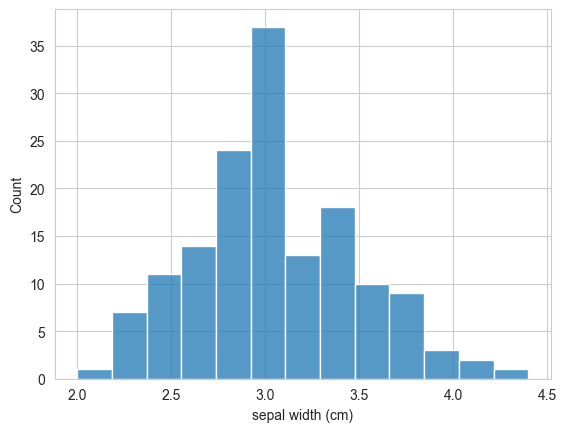

In [2]:
sns.histplot(df['sepal width (cm)'])
plt.show()

## b. Based on the histogram from #1a, which would you expect to be higher, the mean or the median? Why? {-}

In this histogram, the mean is greater than the median. This is because the most frequent values are concentrated on the left, causing the median to be located toward the left side, while the mean is skewed to the right due to the influence of higher extreme values.

## c. Confirm your answer to #1b by actually finding these values. {-}

In [3]:
sw_mean = df['sepal width (cm)'].mean()
sw_median = df['sepal width (cm)'].median()
sw_higher = "mean" if sw_mean > sw_median else "median"

print(f"Mean of Sepal.Width: {sw_mean}")
print(f"Median of Sepal.Width: {sw_median}")
print(f"The higher value is: {sw_higher}")

Mean of Sepal.Width: 3.0573333333333337
Median of Sepal.Width: 3.0
The higher value is: mean


## d. Only 27% of the flowers have a Sepal.Width higher than ________ cm. {-}

In [4]:
print(f"Only 27% of the flowers have a Sepal.Width higher than {df['sepal width (cm)'].quantile(1 - 0.27)} cm.")

Only 27% of the flowers have a Sepal.Width higher than 3.3 cm.


## e. Make scatterplots of each pair of the numerical variables in iris (There should be 6 pairs/plots). {-}

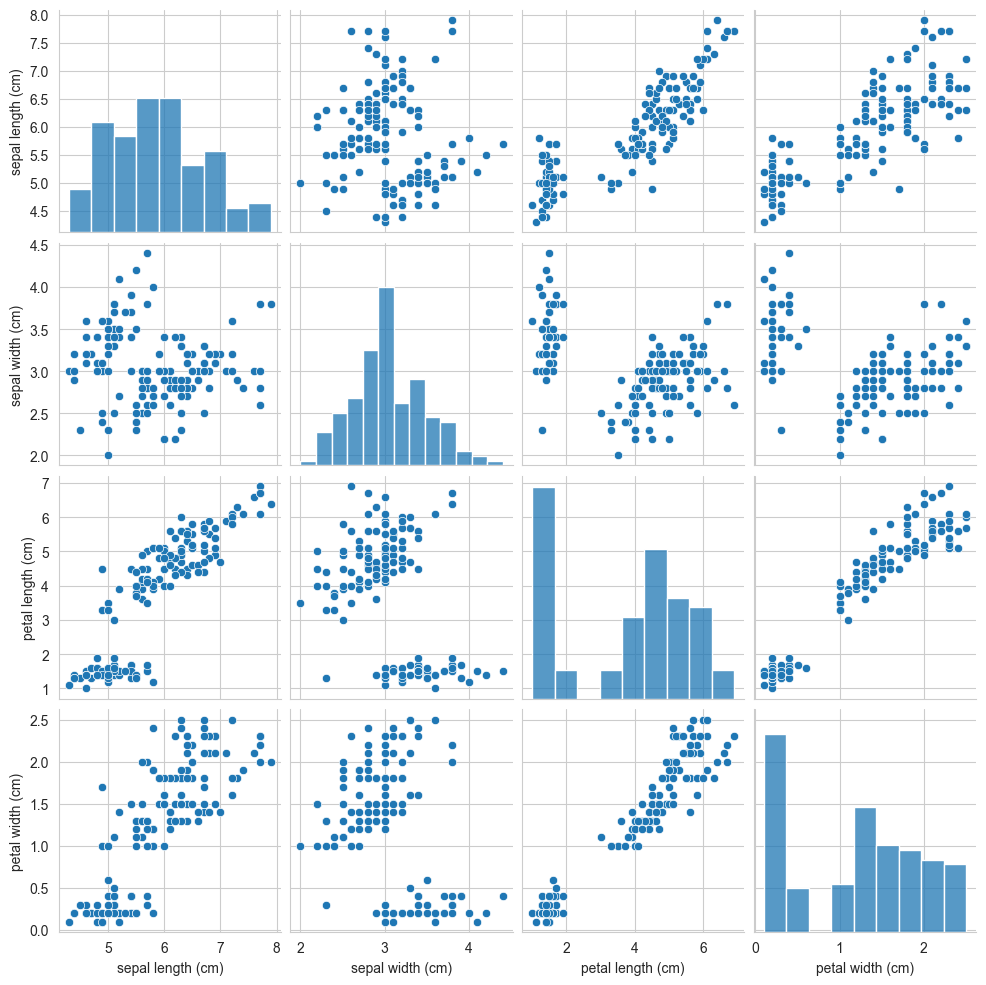

In [5]:
sns.pairplot(df, kind="scatter", markers='o')
plt.show()

## f. Based on #1e, which two variables appear to have the strongest relationship? And which two appear to have the weakest relationship? {-}

As shown in the plot below, **sepal length (cm)** and **petal length (cm)** appear to have the strongest relationship. When drawing a line through the scatter plot, the points are concentrated along both sides of the line, which slopes from the bottom left to the top right, indicating a clear positive relationship between the two variables.<br>
In contrast, **sepal length (cm)** and **sepal width (cm)** seem to have the weakest relationship, as many scatter points lie far from the line, making it difficult to identify any clear pattern or correlation.

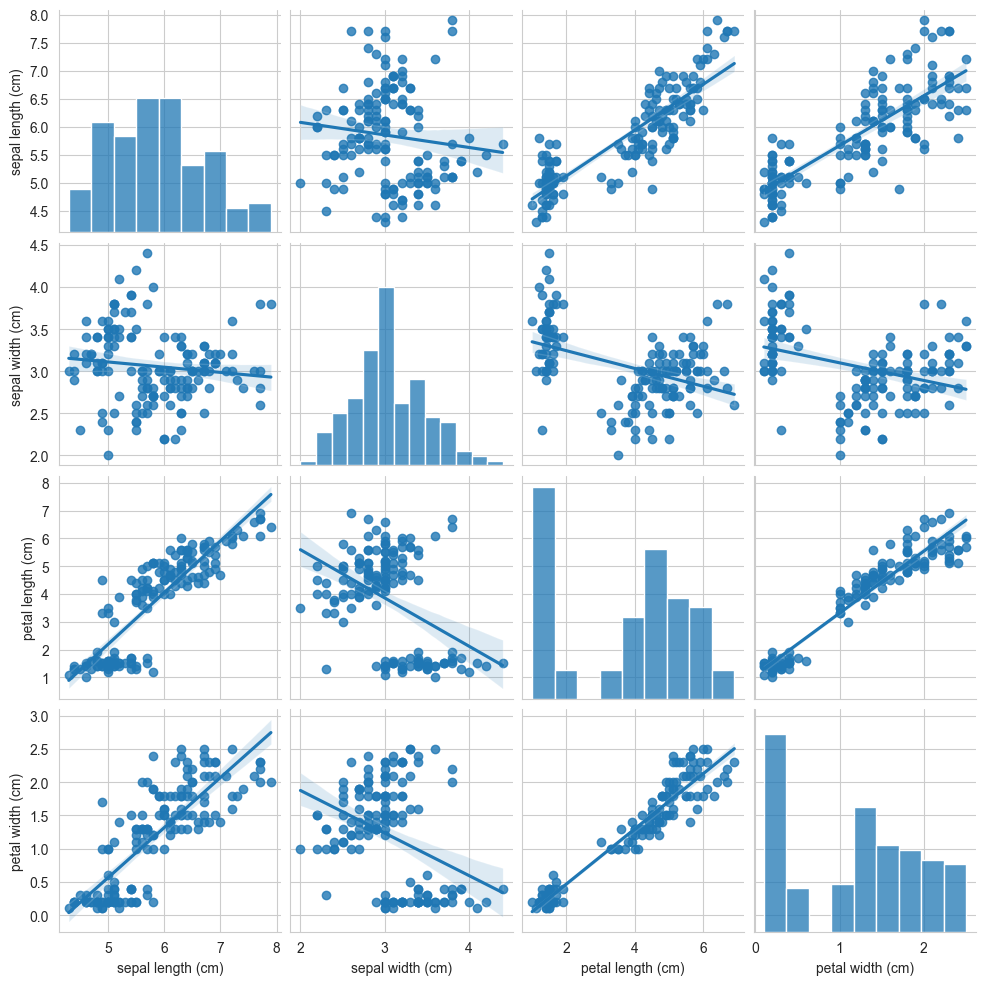

In [6]:
sns.pairplot(df, kind="reg", markers='o')
plt.show()

# 2. Using the PlantGrowth dataset {-}

In [7]:
data = { "weight": [4.17, 5.58, 5.18, 6.11, 4.50, 4.61, 5.17, 4.53, 5.33, 5.14, 4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69, 6.31, 5.12, 5.54, 5.50, 5.37, 5.29, 4.92, 6.15, 5.80, 5.26], "group": ["ctrl"] * 10 + ["trt1"] * 10 + ["trt2"] * 10}
PlantGrowth = pd.DataFrame(data)
PlantGrowth.head()

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


## a. Make a histogram of the variable weight with breakpoints (bin edges) at every 0.3 units, starting at 3.3. {-}

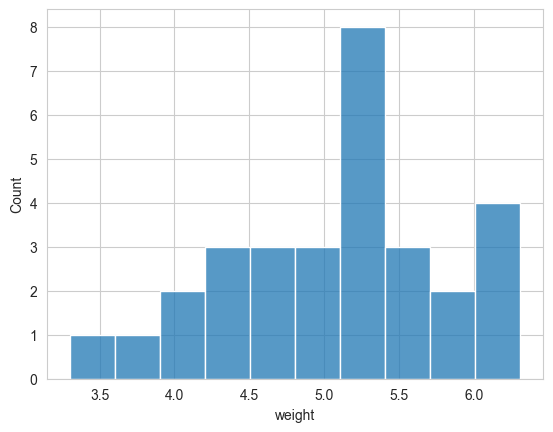

In [8]:
sns.histplot(
    data=PlantGrowth['weight'],
    binwidth=0.3,
    binrange=(3.3, PlantGrowth['weight'].max())
)
plt.show()

## b. Make boxplots of weight separated by group in a single graph. {-}

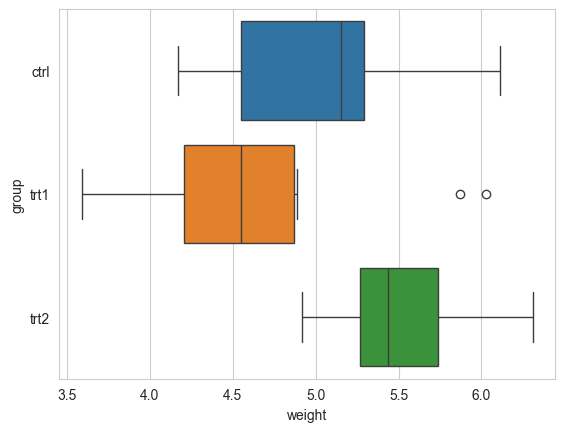

In [9]:
sns.boxplot(
    data=PlantGrowth,
    x='weight',
    y='group',
    hue='group'
)
plt.show()

## c. Based on the boxplots in #2b, approximately what percentage of the "trt1" weights are below the minimum "trt2" weight? {-}

Based on the boxplots in #2b, at least 75% of the **trt1** weights, as well as its maximum (excluding a few extreme outliers), fall to the left of the minimum **trt2** weight. Therefore, it is estimated that around 85% of the **trt1** weights are below the minimum **trt2** weight.

## d. Find the exact percentage of the "trt1" weights that are below the minimum "trt2" weight. {-}

In [10]:
trt1 = PlantGrowth[PlantGrowth['group'] == 'trt1']['weight']
trt2_min = PlantGrowth[PlantGrowth['group'] == 'trt2']['weight'].min()
p = (trt1 < trt2_min).mean() * 100
print(f'{p:.2f}% of the "trt1" weights are below the minimum "trt2" weight.')

80.00% of the "trt1" weights are below the minimum "trt2" weight.


## e. Only including plants with a weight above 5.5, make a barplot of the variable group. Make the barplot colorful using some color palette. {-}

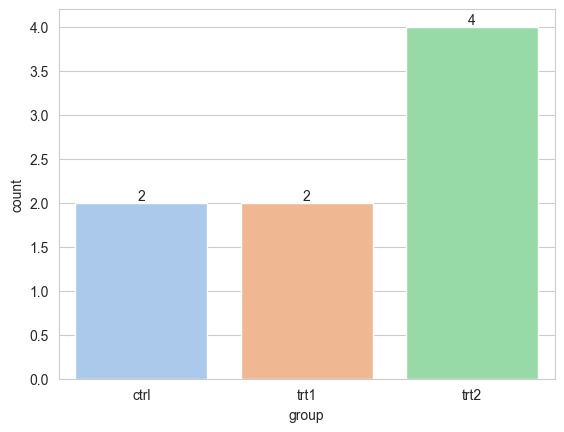

In [11]:
sns.set_palette('pastel')
ax = sns.countplot(
    data=PlantGrowth[PlantGrowth['weight'] > 5.5],
    x='group',
    hue='group'
)

for i in ax.containers:
    ax.bar_label(i)

plt.show()